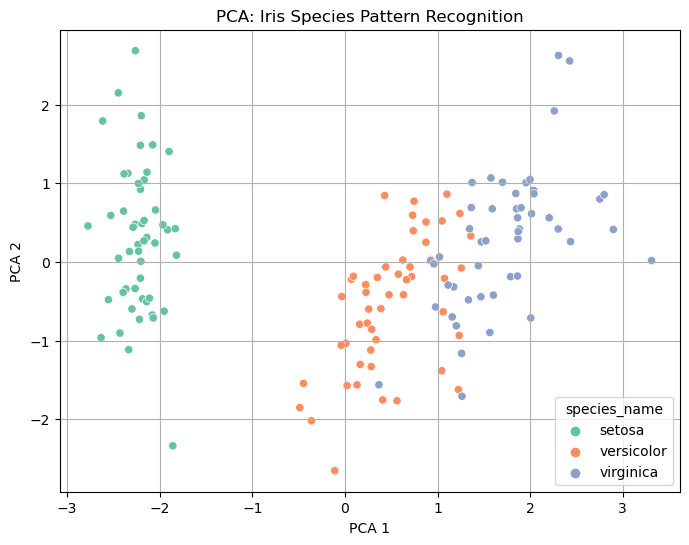


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



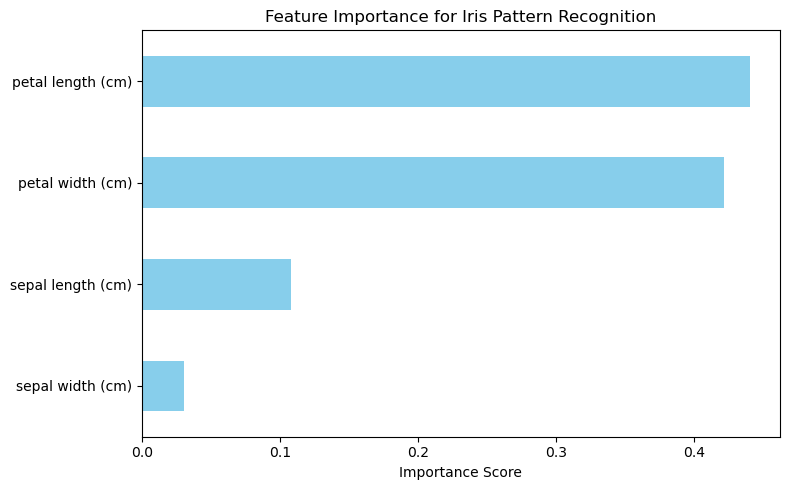

In [1]:
# Pattern Recognition System using Iris Dataset

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})

# Preprocess and standardize
X = df[iris.feature_names]
y = df['species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature extraction: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['species_name'], palette='Set2')
plt.title('PCA: Iris Species Pattern Recognition')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# Split dataset for classification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Display classification results
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Extract and visualize feature importances (patterns)
importances = clf.feature_importances_
feature_pattern = pd.Series(importances, index=iris.feature_names)
plt.figure(figsize=(8,5))
feature_pattern.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Feature Importance for Iris Pattern Recognition')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
df = pd.read_csv(r"C:\Users\Shaikh Irfan\Downloads\drive-download-20250419T131102Z-001\IRIS [GRP A1 B7].csv")
df.head(5)

,Unnamed: 0,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
X = df.drop('class',axis=1)
y= df['class']

In [22]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)

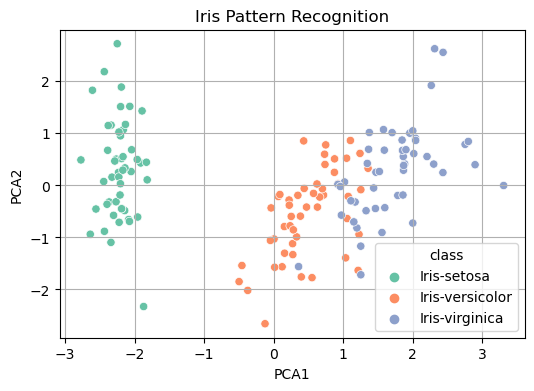

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=df['class'],palette='Set2')
plt.title('Iris Pattern Recognition')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=42)

In [58]:
clf = RandomForestClassifier(random_state=42)

In [59]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)